In [1]:
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 
%matplotlib inline

In [2]:
np.random.seed(0)
centroids = [[3,3], [-3, -2], [2, -3], [0, 0]]
X, y = make_blobs(n_samples=5000, centers=centroids, cluster_std=0.8)

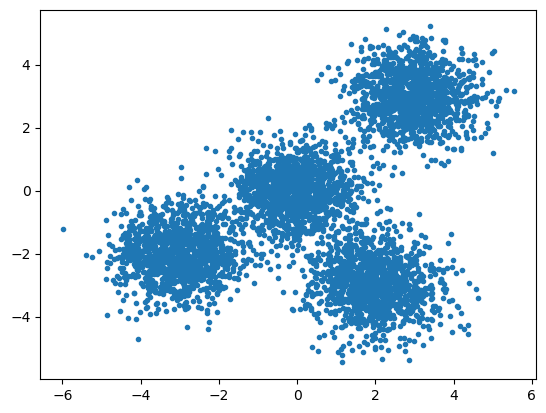

In [3]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [4]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)

In [5]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=15)

Nuqtalar klasterlandi. Klaster raqamini ko'rish uchun .labels_ parametriga murojaat qilamiz.

## datamizda label yoq edi endi labellarga bolib oldik

In [6]:
k_means.labels_

array([2, 0, 0, ..., 1, 2, 2], dtype=int32)

### Klaster markazlarini ko'rich uchun .cluster_centers_ parametriga murojaat qilamiz.

In [7]:
k_means.cluster_centers_

array([[ 1.89977904, -2.77630437],
       [ 2.7755098 ,  2.79624706],
       [-1.84461134, -1.14900774]])

In [8]:
print(centroids)

[[3, 3], [-3, -2], [2, -3], [0, 0]]


In [9]:
print(np.round(k_means.cluster_centers_))

[[ 2. -3.]
 [ 3.  3.]
 [-2. -1.]]


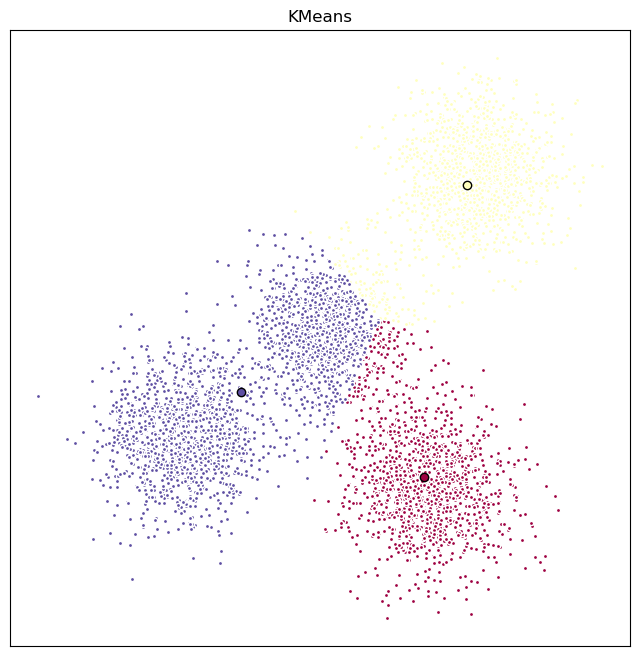

In [10]:
fig = plt.figure(figsize=(8, 8))
# Har bir klaster uchun alohida rang
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means.labels_ == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means.cluster_centers_[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()